In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/praktikum/praktikum3/"

In [ ]:
# Import Library Dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Library Statistik
import statsmodels.api as sm

In [ ]:
# Membaca dataset
df = pd.read_csv(path + '/data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Analisis korelasi

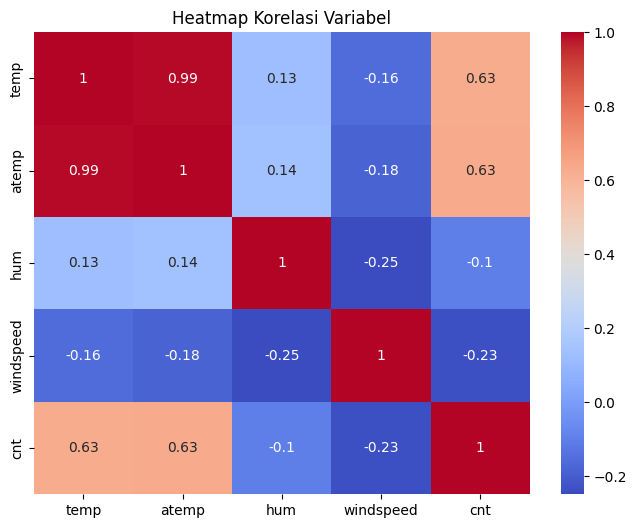

In [ ]:
# Melihat korelasi antar variabel numerik
plt.figure(figsize=(8,6))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel')
plt.show()

Menetukan Variable

In [ ]:
# Variabel dependen (target)
y = df['cnt']

# Variabel independen (fitur)
X = df[['temp', 'atemp', 'hum', 'windspeed', 'season', 'weathersit']]

# Melihat sebagian data
X.head(), y.head()

(       temp     atemp       hum  windspeed  season  weathersit
 0  0.344167  0.363625  0.805833   0.160446       1           2
 1  0.363478  0.353739  0.696087   0.248539       1           2
 2  0.196364  0.189405  0.437273   0.248309       1           1
 3  0.200000  0.212122  0.590435   0.160296       1           1
 4  0.226957  0.229270  0.436957   0.186900       1           1,
 0     985
 1     801
 2    1349
 3    1562
 4    1600
 Name: cnt, dtype: int64)

Membagi data menjadi training 805 dan testing 20%

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data train:", X_train.shape[0])
print("Jumlah data test :", X_test.shape[0])

Jumlah data train: 584
Jumlah data test : 147


Membuat model

In [ ]:
from sklearn.linear_model import LinearRegression

# Membuat objek model regresi linear
model = LinearRegression()

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Menampilkan hasil parameter model
print("Intercept (β₀):", model.intercept_)
print("Koefisien (β):", model.coef_)

Intercept (β₀): 3170.3897666737316
Koefisien (β): [ 2760.64635141  3209.29692308 -2279.72730891 -2544.4632139
   418.31628097  -461.83380323]


Evaluasi model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Melakukan prediksi terhadap data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Evaluasi Model ===")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

=== Evaluasi Model ===
Mean Absolute Error (MAE): 1150.0162404537502
Mean Squared Error (MSE): 1835143.8639559024
R2 Score: 0.5423447044366508


Visualisasi hasil

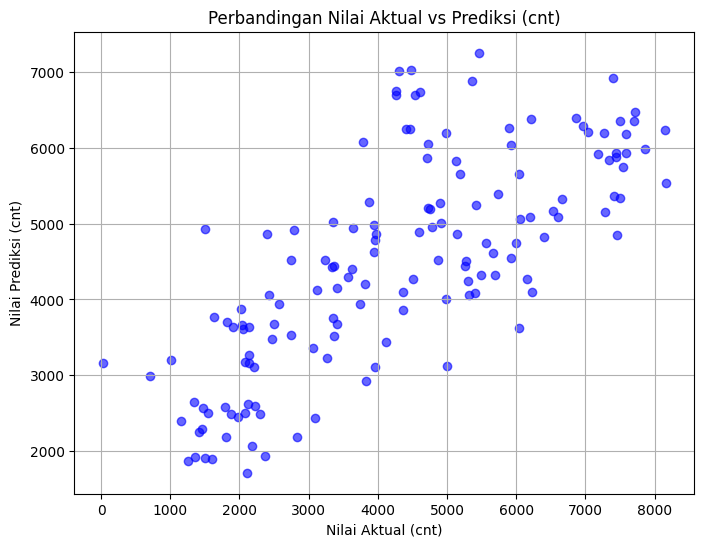

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel('Nilai Aktual (cnt)')
plt.ylabel('Nilai Prediksi (cnt)')
plt.title('Perbandingan Nilai Aktual vs Prediksi (cnt)')
plt.grid(True)
plt.show()

Analisis Statistik

In [ ]:
import statsmodels.api as sm

# Menambahkan kolom konstanta (β₀)
X_train_ols = sm.add_constant(X_train)

# Membuat model OLS
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Menampilkan hasil summary
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           5.61e-86
Time:                        15:37:27   Log-Likelihood:                -5034.0
No. Observations:                 584   AIC:                         1.008e+04
Df Residuals:                     577   BIC:                         1.011e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3170.3898    384.175      8.252      0.000    2415.838    3924.942
temp        2760.6464   2253.265      1.225      0.221   -1664.955    7186.248
atemp       3209.2969   2550.279      1.258      0.209   -1799.664    8218.258
hum        -2279.7273    531.733     -4.287      0.000   -3324.096   -1235.359
windspeed  -2544.4632    790.291     -3.220      0.001   -4096.662    -992.265
season       418.3163     55.314      7.563      0.000     309.675     526.958
weathersit  -461.8338    132.731     -3.479      0.001    -722.529    -201.139
==============================================================================
Omnibus:                       10.531   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.003
Skew:                           0.121   Prob(JB):                       0.0302
Kurtosis:                       2.522   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""